In [3]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql.types import *

StatementMeta(, 83e43954-15da-4d92-9348-d89cfcd9cfd1, 5, Finished, Available, Finished)

### **CRUD: Create, Read, Update and Delete**

###### **_Create_**

In [12]:
# Adicionando uma nova linha

linha = [('Carlos', 35, 'Jundiaí')]

df = spark.createDataFrame(linha, schema='Nome STRING, Idade INT, Cidade STRING')

df.show()

StatementMeta(, 83e43954-15da-4d92-9348-d89cfcd9cfd1, 14, Finished, Available, Finished)

+------+-----+-------+
|  Nome|Idade| Cidade|
+------+-----+-------+
|Carlos|   35|Jundiaí|
+------+-----+-------+



In [13]:
# Adicionando múltiplas linhas

pessoas = [('Ana', 29, 'São Paulo'), ('Luis', 40, 'Várzea Paulista'), ('Beatriz', 23, 'Sorocaba'), ('Ana', 29, 'São Paulo'), ('João', 34, 'Jundiaí')]

df_pessoas = spark.createDataFrame(pessoas, schema='Nome STRING, Idade INT, Cidade STRING')

df = df.union(df_pessoas) # Une os DataFrames

df.show()

StatementMeta(, 83e43954-15da-4d92-9348-d89cfcd9cfd1, 15, Finished, Available, Finished)

+-------+-----+---------------+
|   Nome|Idade|         Cidade|
+-------+-----+---------------+
| Carlos|   35|        Jundiaí|
|    Ana|   29|      São Paulo|
|   Luis|   40|Várzea Paulista|
|Beatriz|   23|       Sorocaba|
|    Ana|   29|      São Paulo|
|   João|   34|        Jundiaí|
+-------+-----+---------------+



In [14]:
display(df)

StatementMeta(, 83e43954-15da-4d92-9348-d89cfcd9cfd1, 16, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, d52c9ed0-fd1b-4d71-aeaf-0150794f9748)

#### Mas o que é um **dataframe**?

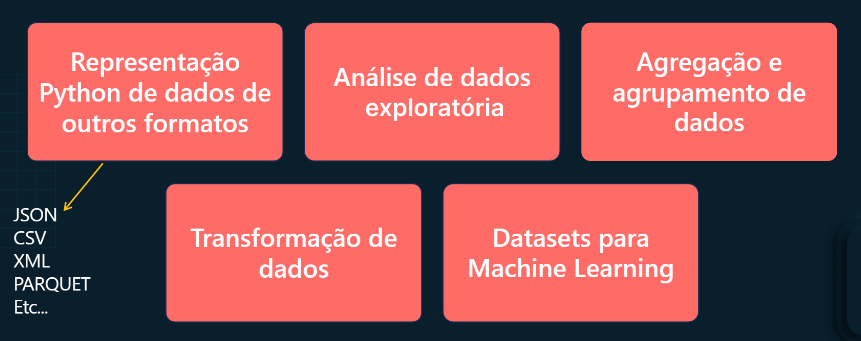

##### _**Funções:**_
###### Criar dataframe com base em um array. Possui o parâmetro Schema, que especifica a estrutura e os tipos das colunas:
```
spark.createDataFrame(dados, schema='Coluna TIPO')
```
###### Combinar duas ou mais DataFrames verticalmente, empilhando os dados de um sobre o outro:

```
.union()
```

###### **_Read_**

In [17]:
# Exibe o DataFrame

# df.select('Nome')

# df.collect()

# df.select('Nome').distinct()

# df.head(5)

# df.show()

display(df)

StatementMeta(, 83e43954-15da-4d92-9348-d89cfcd9cfd1, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 20081935-d1d1-4980-aea3-83d326cbbe7c)

In [68]:
# Filtrar dados

# df.filter(df.Nome == 'Carlos').show()

# df.filter(df.Idade >= 30).select('Nome', 'Idade').show()

df.filter((df.Idade <= 30) & (col('Nome').contains('Ana'))).select('Nome', 'Idade').show()

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 69, Finished, Available, Finished)

+----+-----+
|Nome|Idade|
+----+-----+
| Ana|   29|
| Ana|   29|
+----+-----+



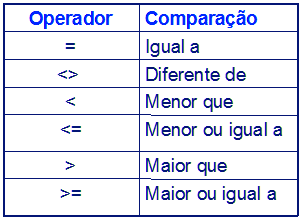
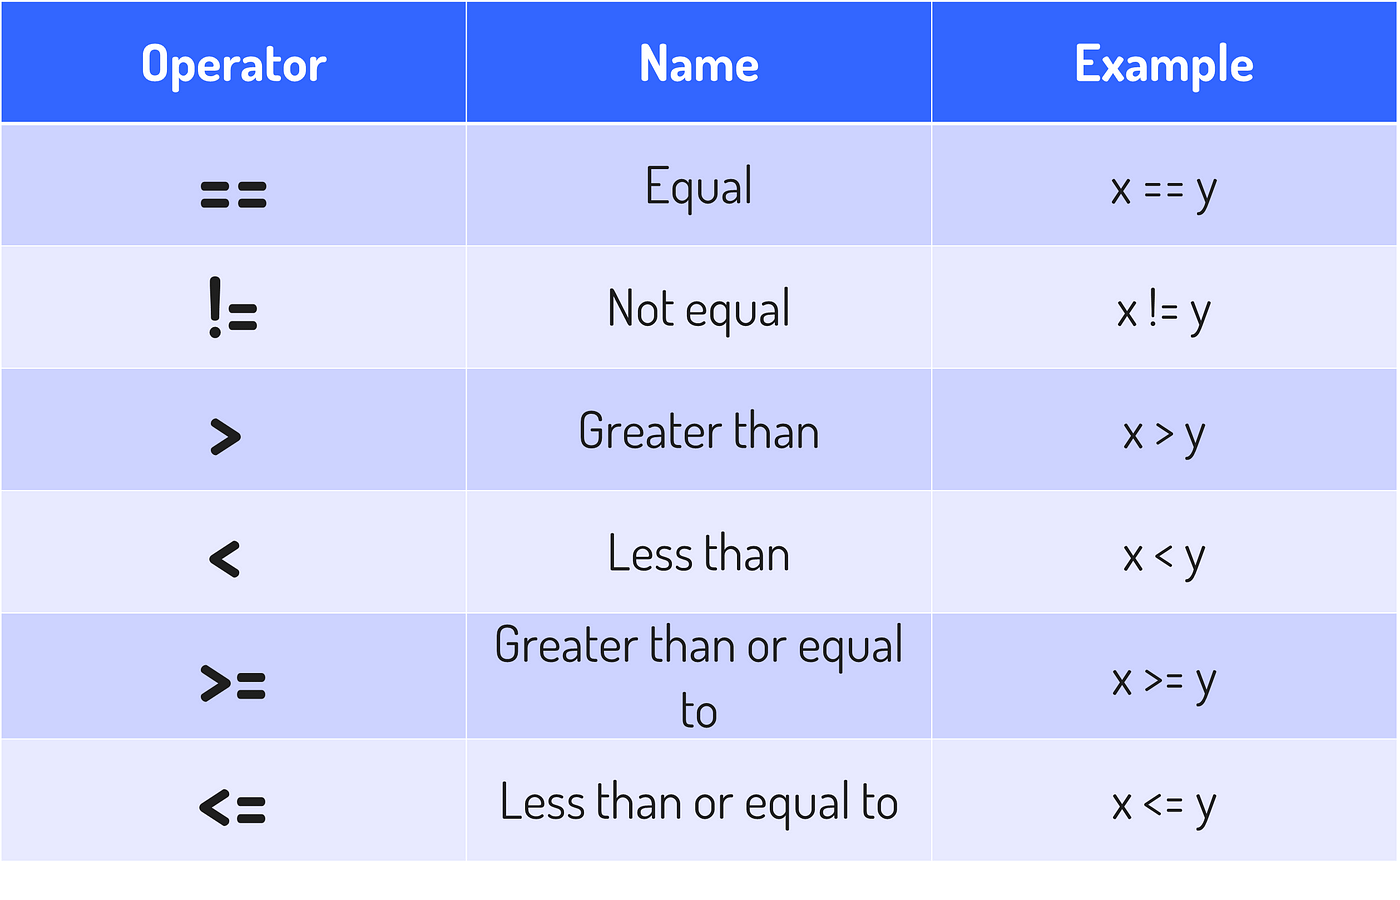
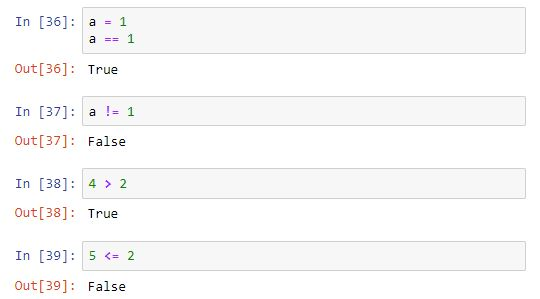

###### _**Funções:**_
Aplica uma condição para retornar apenas as linhas que atendem ao critério especificado:
```
.filter()
```
Refere-se a uma coluna específica do DataFrame, permitindo manipulações e operações sobre ela:
```
col("Coluna")
```
Verifica se uma string ou padrão específico está contido em uma coluna de texto:
```
.contains()
```
Seleciona colunas específicas do DataFrame para exibição ou operações:
```
.select()
```

###### **_Update_**

In [69]:
# Atualizar valor usando coluna

df = df.withColumn("Idade", when(col("Nome") == "Beatriz", 24).otherwise(col("Idade")))

df.show()

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 70, Finished, Available, Finished)

+-------+-----+---------------+
|   Nome|Idade|         Cidade|
+-------+-----+---------------+
| Carlos|   35|        Jundiaí|
|    Ana|   29|      São Paulo|
|   Luis|   40|Várzea Paulista|
|Beatriz|   24|       Sorocaba|
|    Ana|   29|      São Paulo|
|   João|   34|        Jundiaí|
+-------+-----+---------------+



###### _**Funções:**_
Cria ou substitui uma coluna existente no DataFrame com base nos valores ou transformações aplicadas:
```
.withColumn("Coluna", ...)
```
Define o valor padrão para uma coluna caso uma condição anterior não seja atendida, preservando o valor original:
```
.otherwise()
```
Aplica uma condição para transformar ou definir valores em uma coluna.:
```
when()
```

###### **_Delete_**

In [70]:
# Remover linha pelo nome

df = df.filter(df.Nome != "Beatriz")

df.show()

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 71, Finished, Available, Finished)

+------+-----+---------------+
|  Nome|Idade|         Cidade|
+------+-----+---------------+
|Carlos|   35|        Jundiaí|
|   Ana|   29|      São Paulo|
|  Luis|   40|Várzea Paulista|
|   Ana|   29|      São Paulo|
|  João|   34|        Jundiaí|
+------+-----+---------------+



In [71]:
# Removendo linhas duplicadas

df = df.dropDuplicates()

df.show()

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 72, Finished, Available, Finished)

+------+-----+---------------+
|  Nome|Idade|         Cidade|
+------+-----+---------------+
|Carlos|   35|        Jundiaí|
|   Ana|   29|      São Paulo|
|  Luis|   40|Várzea Paulista|
|  João|   34|        Jundiaí|
+------+-----+---------------+



###### _**Join: Unindo DataFrames**_

In [72]:
# Criando novo DataFrame

salarios = [("Carlos", 4500), ("Ana", 6000), ("Luis", 7000), ("Amanda", 3000)]

df_salarios = spark.createDataFrame(salarios, schema='Nome STRING, Salario INT')

df_salarios.show()

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 73, Finished, Available, Finished)

+------+-------+
|  Nome|Salario|
+------+-------+
|Carlos|   4500|
|   Ana|   6000|
|  Luis|   7000|
|Amanda|   3000|
+------+-------+



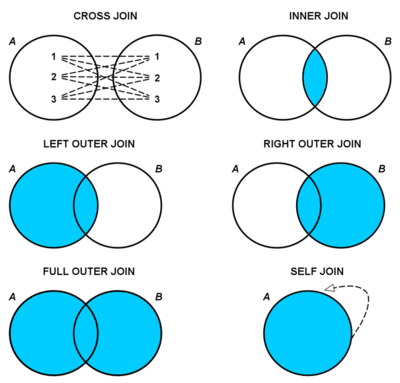
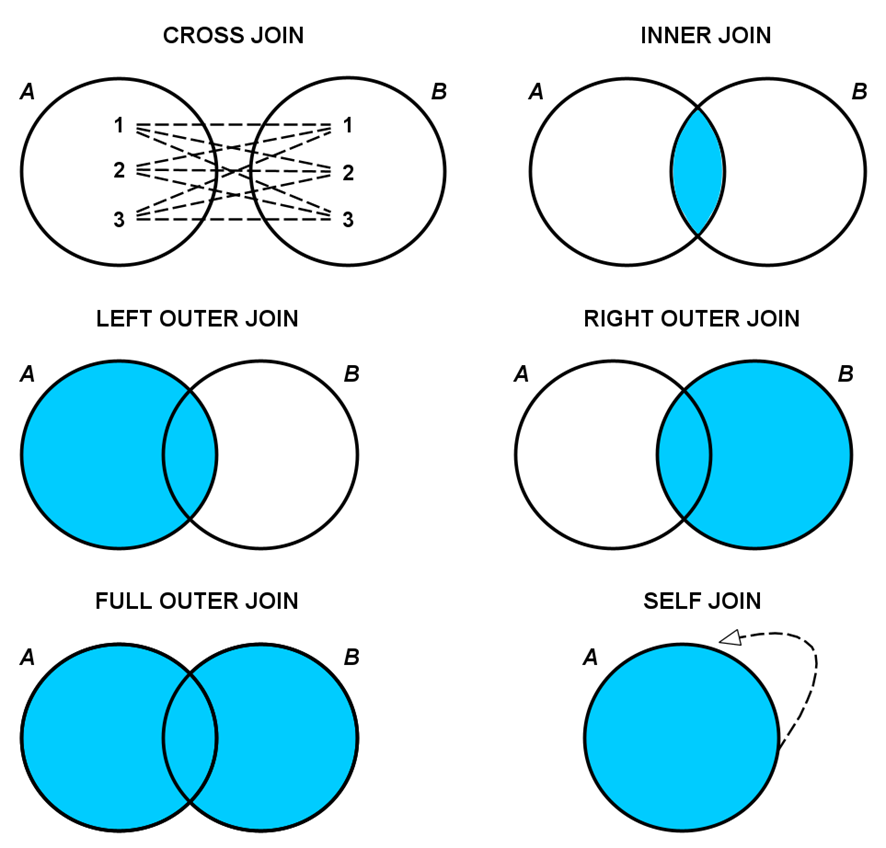
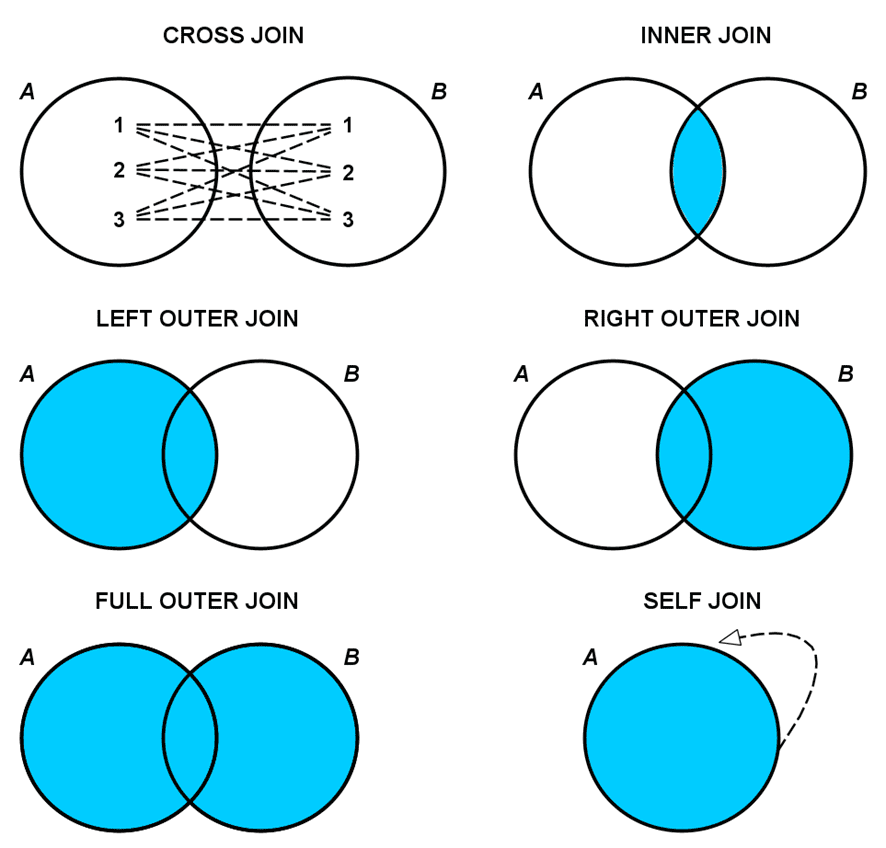

In [73]:
# Realizando diferentes tipos de Join

df_inner = df.join(df_salarios, on='Nome', how='inner')

df_left = df.join(df_salarios, on='Nome', how='left')

df_right = df.join(df_salarios, on='Nome', how='right')

df_outer = df.join(df_salarios, on='Nome', how='outer')

df_inner.show()

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 74, Finished, Available, Finished)

+------+-----+---------------+-------+
|  Nome|Idade|         Cidade|Salario|
+------+-----+---------------+-------+
|Carlos|   35|        Jundiaí|   4500|
|   Ana|   29|      São Paulo|   6000|
|  Luis|   40|Várzea Paulista|   7000|
+------+-----+---------------+-------+



![](image-URL)

###### _**Agregrações: Resumindo e combinando dados**_

In [74]:
salarios = [(1, 'Carlos', 'Engenheiro', 9000, 'SP'),
            (2, 'Ana', 'Engenheiro', 8500, 'RJ'),
            (3, 'Luis', 'Analista', 6500, 'MG'),
            (4, 'Beatriz', 'Analista', 6200, 'SP'),
            (5, 'Pedro', 'Gerente', 10000, 'RS')]

df_salarios = spark.createDataFrame(salarios, schema='ID INT, Nome STRING, Cargo STRING, Salario INT, Estado STRING')

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 75, Finished, Available, Finished)

In [78]:
# Contagem de valores distintos por cargo

df_salarios.groupBy('Cargo').count().show()

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 79, Finished, Available, Finished)

+----------+-----+
|     Cargo|count|
+----------+-----+
|Engenheiro|    2|
|  Analista|    2|
|   Gerente|    1|
+----------+-----+



In [76]:
# Salário médio por cargo

df_salarios.groupBy('Cargo').avg('Salario').show()


StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 77, Finished, Available, Finished)

+----------+------------+
|     Cargo|avg(Salario)|
+----------+------------+
|Engenheiro|      8750.0|
|  Analista|      6350.0|
|   Gerente|     10000.0|
+----------+------------+



In [77]:
# Salário mínimo por estado

df_salarios.groupBy('Estado').min('Salario').show()

StatementMeta(, f95402cc-9e7f-481f-b73d-897e61474f29, 78, Finished, Available, Finished)

+------+------------+
|Estado|min(Salario)|
+------+------------+
|    SP|        6200|
|    RJ|        8500|
|    MG|        6500|
|    RS|       10000|
+------+------------+



Agrupa as linhas do DataFrame com base em uma ou mais colunas.
```
groupBy()
```

Conta o número de ocorrências:
```
count()
```

Calcula a média (média aritmética) dos valores:
```
avg()
```

Retorna o valor mínimo de uma coluna:
```
min()
```

Retorna o valor máximo de uma coluna:
```
max()
```

#### _**Lendo arquivos externos**_

In [ ]:
df = spark.read.csv("Files/TABELA_VENDAS.csv", header=True)

display(df)

StatementMeta(, , , Waiting, , Waiting)

SynapseWidget(Synapse.DataFrame, 6a79d73d-aacd-4caf-be6a-a34d3168b786)

In [ ]:
df = spark.read.format("csv").option("header", "true").load("abfss://85718698-872f-4ed2-b22e-50273ba4f3aa@onelake.dfs.fabric.microsoft.com/421411f7-bfeb-47af-8a26-9c99641ccffc/Files/TABELA_VENDAS.csv")

display(df)

StatementMeta(, , , Waiting, , Waiting)

SynapseWidget(Synapse.DataFrame, 6c5feb1c-3880-4db2-ac70-371618759995)

#### **Responda: Quais os modelos de BICICLETAS são vendidas na cor VERMELHA?**

StatementMeta(, 83e43954-15da-4d92-9348-d89cfcd9cfd1, 6, Finished, Available, Finished)